In [1]:
import numpy as np   # linear algebra
import pandas as pd # data processing
import warnings    # ignore the warnings
warnings.filterwarnings('ignore')

**Reading the Datasets**

In [2]:
#ADA
ada=pd.read_csv("../input/crypto-data/ada_data.csv",index_col=0)
ada.rename(columns={"0":"Date", "1":"Price"},inplace = True)
ada.head()

,Date,Price
0,2017-11-06,1.562341
1,2017-11-13,1.825773
2,2017-11-20,2.349590
3,2017-11-27,8.502870
4,2017-12-04,7.109816


In [3]:
#BTC
btc=pd.read_csv("../input/crypto-data/btc_data.csv",index_col=0)
btc.rename(columns={"0" : "Date","1":"Price"},inplace = True)
btc.head()

,Date,Price
0,2014-09-15,24268.258
1,2014-09-22,23060.846
2,2014-09-29,19722.584
3,2014-10-06,23193.697
4,2014-10-13,23898.646


In [4]:
#ETH
eth=pd.read_csv("../input/crypto-data/btc_data.csv",index_col=0)
eth.rename(columns={"0" : "Date","1":"Price"},inplace = True)
eth.head()

,Date,Price
0,2014-09-15,24268.258
1,2014-09-22,23060.846
2,2014-09-29,19722.584
3,2014-10-06,23193.697
4,2014-10-13,23898.646


## Data Analysis and Visualisation 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

**Adding a column crypto_name for all the 3 datasets separately**

In [6]:
for i in range(0,len(ada)):
    ada['crypto_name']='ada'
    
for i in range(0,len(btc)):
    btc['crypto_name']='btc'
    
for i in range(0,len(eth)):
    eth['crypto_name']='eth'

**Viewing the updated datasets**

In [7]:
ada.head()

,Date,Price,crypto_name
0,2017-11-06,1.562341,ada
1,2017-11-13,1.825773,ada
2,2017-11-20,2.349590,ada
3,2017-11-27,8.502870,ada
4,2017-12-04,7.109816,ada


In [8]:
btc.head()

,Date,Price,crypto_name
0,2014-09-15,24268.258,btc
1,2014-09-22,23060.846,btc
2,2014-09-29,19722.584,btc
3,2014-10-06,23193.697,btc
4,2014-10-13,23898.646,btc


In [9]:
eth.head()

,Date,Price,crypto_name
0,2014-09-15,24268.258,eth
1,2014-09-22,23060.846,eth
2,2014-09-29,19722.584,eth
3,2014-10-06,23193.697,eth
4,2014-10-13,23898.646,eth


**Concatenating the dataframes to form a new dataframe**

In [10]:
new_df = pd.concat([ada,btc,eth])

**Viewing the new dataset**

In [11]:
new_df

,Date,Price,crypto_name
0,2017-11-06,1.562341e+00,ada
1,2017-11-13,1.825773e+00,ada
2,2017-11-20,2.349590e+00,ada
3,2017-11-27,8.502870e+00,ada
4,2017-12-04,7.109816e+00,ada
...,...,...,...
387,2022-02-14,2.870256e+06,eth
388,2022-02-21,2.830794e+06,eth
389,2022-02-28,2.936117e+06,eth
390,2022-03-07,3.009494e+06,eth


**Save the file and then remove the previous index**

In [12]:
## Save file
new_df.to_csv('new_df.csv')

In [13]:
## Read the saved file
new_df = pd.read_csv('new_df.csv')

In [14]:
## Drop the column "Unnamed: 0" (previous index) 
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
## View the dataset with proper index
new_df

,Date,Price,crypto_name
0,2017-11-06,1.562341e+00,ada
1,2017-11-13,1.825773e+00,ada
2,2017-11-20,2.349590e+00,ada
3,2017-11-27,8.502870e+00,ada
4,2017-12-04,7.109816e+00,ada
...,...,...,...
1007,2022-02-14,2.870256e+06,eth
1008,2022-02-21,2.830794e+06,eth
1009,2022-02-28,2.936117e+06,eth
1010,2022-03-07,3.009494e+06,eth


**Crypto with highest value**

In [16]:
new_df[(new_df['Price']) == (new_df['Price'].max())]

,Date,Price,crypto_name
601,2021-11-08,4867364.0,btc
993,2021-11-08,4867364.0,eth


**Crypto with lowest value**

In [17]:
new_df[(new_df['Price']) == (new_df['Price'].min())]

,Date,Price,crypto_name
0,2017-11-06,1.562341,ada


**Number of crypto prices present in each year**

In [18]:
pd.DatetimeIndex(new_df['Date']).year.value_counts()

2018    159
2019    156
2020    156
2021    156
2017    112
2015    104
2016    104
2022     33
2014     32
Name: Date, dtype: int64

**Different crypto entries in each year**

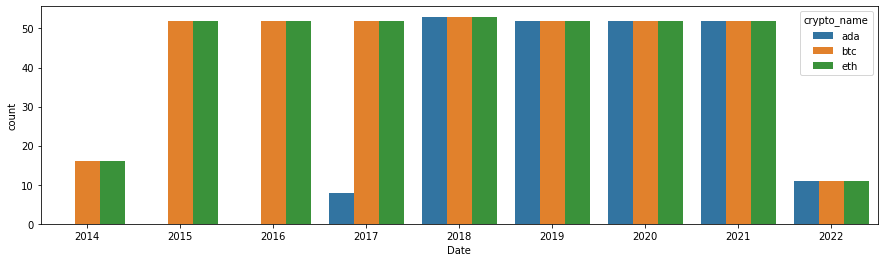

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(x=pd.DatetimeIndex(new_df['Date']).year,hue='crypto_name',data=new_df)
plt.show()

**Creating a new dataframe for comparison on crypto_currencies**

In [20]:
## Merging the dataframes
df12 = ada.merge(btc, on='Date')

In [21]:
df13 = df12.merge(eth, on='Date')

In [22]:
## Removing the crypto names
df13.drop(['crypto_name_y','crypto_name','crypto_name_x'],axis=1,inplace=True)

In [23]:
## Renamming the columns
df13.rename(columns = {'Price_x':'ada','Price_y':'btc','Price':'eth'},inplace=True)

In [24]:
## Viewing the updated dataset
df13.head()

,Date,ada,btc,eth
0,2017-11-06,1.562341,387706.56,387706.56
1,2017-11-13,1.825773,522452.22,522452.22
2,2017-11-20,2.349590,603406.60,603406.60
3,2017-11-27,8.502870,730459.60,730459.60
4,2017-12-04,7.109816,996409.70,996409.70


**Cumulative returns of the largest crypto-currency**

In [25]:
df13pct = df13[['ada','btc','eth']].pct_change()

In [26]:
df13_cum_returns = (df13pct + 1).cumprod() - 1

In [27]:
df13_cum_returns.head()

,ada,btc,eth
0,NaN,NaN,NaN
1,0.168614,0.347545,0.347545
2,0.503891,0.556349,0.556349
3,4.442391,0.884053,0.884053
4,3.550745,1.570010,1.570010


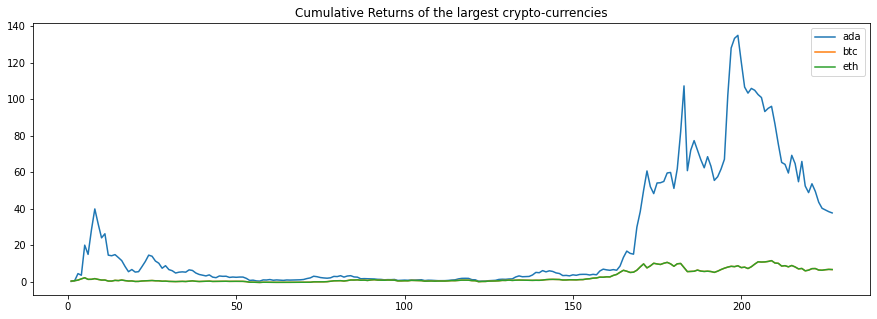

In [28]:
df13_cum_returns.plot(figsize=(15,5))
plt.title('Cumulative Returns of the largest crypto-currencies')
plt.show()

**Plotting date vs price for all the crypto-currencies**

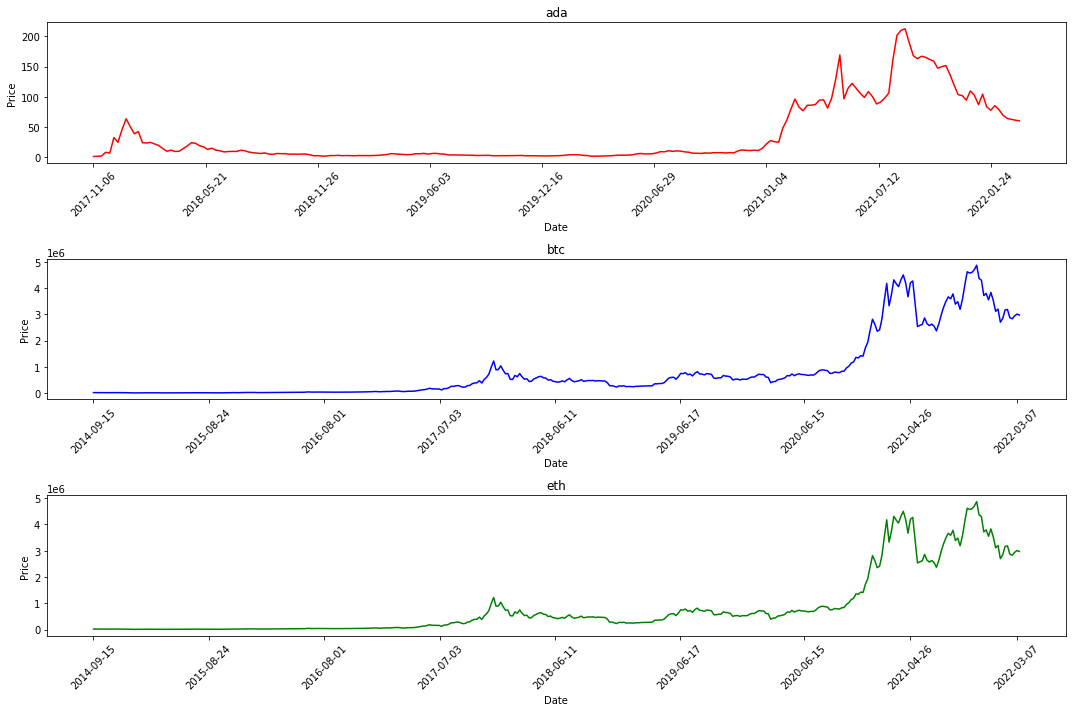

In [29]:
plt.figure(figsize=(15,10))

plt.subplot(3, 1, 1 )
plt.title('ada')
sns.lineplot(x='Date', y='Price', data = ada, color= 'r')
plt.xticks(ticks=[0,27.5,55,82.5,110,137.5,165,192.5,220],rotation=45)

plt.subplot(3,1,2)
plt.title('btc')
sns.lineplot(x='Date', y='Price', data= btc, color= 'b')
plt.xticks(ticks=[0,48.75,97.5,146.5,195,247.5,300,345,390],rotation=45)


plt.subplot(3,1,3)
plt.title('eth')
sns.lineplot(x='Date', y='Price', data= eth, color= 'g')
plt.xticks(ticks=[0,48.75,97.5,146.5,195,247.5,300,345,390],rotation=45)


plt.tight_layout()
plt.savefig('individual_plots_data_vs_price')

### Predictions
The following set of code predicts the price of bitcoin, ada and etherium for the coming set of days


**Creating new dataframes with only Price columns**

In [30]:
ada1 = pd.read_csv('../input/cryptocurrencypricehistory/coin_Aave.csv')
btc1 = pd.read_csv('../input/cryptocurrencypricehistory/coin_Bitcoin.csv')
eth1 = pd.read_csv('../input/cryptocurrencypricehistory/coin_Ethereum.csv')

In [31]:
ada1 = ada1[['Date','Close']]
eth1 = eth1[['Date','Close']]
btc1 = btc1[['Date','Close']]

In [32]:
ada1['Date'] = pd.DatetimeIndex(ada1['Date']).date
eth1['Date'] = pd.DatetimeIndex(eth1['Date']).date
btc1['Date'] = pd.DatetimeIndex(btc1['Date']).date

In [33]:
ada1.rename(columns = {'Close':'Price'}, inplace = True)
eth1.rename(columns = {'Close':'Price'}, inplace = True)
btc1.rename(columns = {'Close':'Price'}, inplace = True)

In [34]:
new_btc = pd.DataFrame(btc1['Price'])
new_eth = pd.DataFrame(eth1['Price'])
new_ada = pd.DataFrame(ada1['Price'])

In [35]:
#A variable for predicting 'n' days into the future 
prediction_days = 30
# another column for shifted n units up
new_ada['Prediction'] = new_ada['Price'].shift(-prediction_days)
new_btc['Prediction'] = new_btc['Price'].shift(-prediction_days)
new_eth['Prediction'] = new_eth['Price'].shift(-prediction_days)

In [36]:
# Create independent data set
# Convert the dataframe to a numpy array and drop prediction column
X1 = np.array(new_ada.drop(['Prediction'], 1))
X2 = np.array(new_eth.drop(['Prediction'], 1))
X3 = np.array(new_btc.drop(['Prediction'], 1))
# Remove the last n rows where n is the prediction_days
X1 = X1[:len(new_ada)-prediction_days]
X2 = X2[:len(new_eth)-prediction_days]
X3 = X3[:len(new_btc)-prediction_days]

In [37]:
# Create a depedent data set
# Convert the dataframe to a numpy array and drop prediction column
y1 = np.array(new_ada['Prediction'])
y1 = y1[: -prediction_days]

y2 = np.array(new_eth['Prediction'])
y2 = y2[: -prediction_days]

y3 = np.array(new_btc['Prediction'])
y3 = y3[: -prediction_days]

In [38]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split
# for ada
X1_train, X1_test, y1_train, y1_test =train_test_split(X1,y1,test_size=0.2)

# for eth
X2_train, X2_test, y2_train, y2_test =train_test_split(X2,y2,test_size=0.2)

# for btc
X3_train, X3_test, y3_train, y3_test =train_test_split(X3,y3,test_size=0.2)

In [39]:
# Set the prediction days array equal to last 30 days from the original data
# for ada
prediction_days_array1 = (new_ada.drop(['Prediction'],1))[-prediction_days:]

# for eth
prediction_days_array2 = (new_eth.drop(['Prediction'],1))[-prediction_days:]

# btc
prediction_days_array3 = (new_btc.drop(['Prediction'],1))[-prediction_days:]

In [40]:
from sklearn.svm import SVR
# Create and train the Support Vector Machine (Regression) using radial basis function
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
# for ada
svr_rbf.fit(X1_train, y1_train)
# for eth
svr_rbf.fit(X2_train, y2_train)
# btc
svr_rbf.fit(X3_train, y3_train)

SVR(C=1000.0, gamma=1e-05)

In [41]:
# Test the model
# for ada
svr_rbf_confidence1 = svr_rbf.score(X1_test, y1_test)
print('svr_rbf accuracy for ada',svr_rbf_confidence1 )
# for eth
svr_rbf_confidence2 = svr_rbf.score(X2_test, y2_test)
print('svr_rbf accuracy for eth ',svr_rbf_confidence2 )
# for btc
svr_rbf_confidence3 = svr_rbf.score(X3_test, y3_test)
print('svr_rbf accuracy for ada',svr_rbf_confidence3 )

svr_rbf accuracy for ada -0.6952963459153516
svr_rbf accuracy for eth  0.3096779994772756
svr_rbf accuracy for ada 0.5174910407708805


In [42]:
# Print the predicted values
# for ada
svm_prediction1 = svr_rbf.predict(X1_test)
print(svm_prediction1)
# Print the actual values
print(y1_test)

# for eth
svm_prediction2 = svr_rbf.predict(X2_test)
print(svm_prediction2)
# Print the actual values
print(y2_test)

# for ada
svm_prediction3 = svr_rbf.predict(X3_test)
print(svm_prediction3)
# Print the actual values
print(y3_test)

[444.36104217 114.31830178 535.13022413 389.35180017 417.99503722
 390.37536984 360.12281384 231.65900625 170.80821571 452.64392058
 131.47542384 210.303048   447.09381    461.85646084 353.44676726
 393.22329115 387.67324626 246.05503986 357.84609562 396.99281287
 543.82651284 182.58700825 222.25135248 401.7017242  230.07148272
 246.41019361 397.3980807  193.61841887 443.05847087 449.83019874
 174.45701319 357.17735787 565.23066361 429.49443295 383.12086544
 406.44912584 356.16906837 459.59810647 231.65915122 167.07393636
 201.10770138 358.44956497 456.05854918 473.45455211 436.08825757
 377.7322935  390.44596386 376.60541391 511.88008389]
[369.97811139 518.07254013 381.08260484 367.12553589 383.98994248
 404.30973507 236.76587081  87.5274822  115.00081244 369.37732538
 471.6146565  264.85014401  68.42477869 331.01690893  79.94619074
 210.85982427 430.1746817   75.21556665 345.65529566 444.72879905
  68.85312443 147.2622138  272.3576004  452.40875669 188.27962871
  87.23005839 503.8656

In [43]:
# print the model predictions for next 30 days
#for ada
svm_prediction1 = svr_rbf.predict(prediction_days_array1)
print('FOR ADA ',svm_prediction1)

#for eth
svm_prediction2 = svr_rbf.predict(prediction_days_array2)
print('FOR ETH ',svm_prediction2)

#for btc
svm_prediction3 = svr_rbf.predict(prediction_days_array3)
print('FOR BTC ',svm_prediction3[:30])

FOR ADA  [366.99944729 364.79035539 370.53763938 347.1181396  320.98595992
 313.07498818 353.380202   354.04948584 355.64002694 326.90694514
 329.81945069 294.40731787 282.90378315 306.7172852  211.02597246
 198.27019515 212.96797537 207.2691296  166.51924869 166.19839883
 192.87870139 234.43819931 252.05134084 273.88119735 243.42705418
 247.34624836 287.73243351 311.23335268 344.94870421 353.17941145]
FOR ETH  [2898.12065221 2717.92233008 2989.48793984 2781.02772522 3416.21417264
 3290.70516497 2719.43708037 2734.61982962 3004.32412991 3322.81945544
 3293.90822343 4078.15230237 4167.95879002 4027.97563815 3094.98446344
 3045.65749013 3558.43762554 3552.0162112  2871.72810187 2908.53991849
 3504.13423371 3974.80945221 4165.27621209 3903.24354724 4086.02320059
 4156.10436348 4094.58258839 3628.8892105  4151.48184731 3609.79135562]
FOR BTC  [16155.71733599 16048.6872057  18645.17653842 18273.27509993
 18638.83729717 19068.38899723 17477.28778201 14832.18122592
 15020.61938572 16678.52318

In [44]:
# Predictions for each crypto_currency in a tabular format for 30 days
new_predictions = pd.DataFrame([svm_prediction1,y1_test, svm_prediction2, y2_test, svm_prediction3[:30],y3_test], index=['ADA','ADA_ACTUAL','ETH','ETH_ACTUAL','BTC','BTC_ACTUAL']) 
new_predictions = new_predictions.transpose()
new_predictions.head()

,ADA,ADA_ACTUAL,ETH,ETH_ACTUAL,BTC,BTC_ACTUAL
0,366.999447,369.978111,2898.120652,370.285004,16155.717336,198.229996
1,364.790355,518.072540,2717.922330,11.394600,16048.687206,522.700012
2,370.537639,381.082605,2989.487940,980.921997,18645.176538,8222.078260
3,347.118140,367.125536,2781.027725,225.769000,18273.275100,5067.108472
4,320.985960,383.989942,3416.214173,213.908005,18638.837297,3457.792747


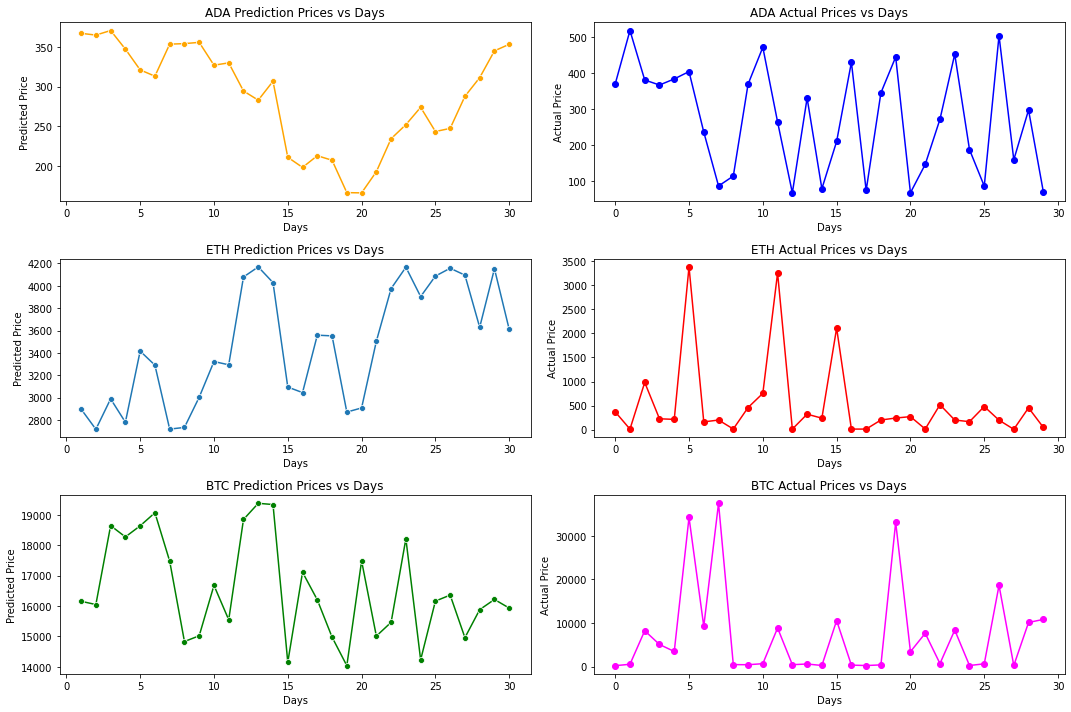

In [45]:
# Plotting the attained dataset
lisst = []
for i in range(1,31):
    lisst.append(i)

plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.lineplot(x = lisst, y = new_predictions['ADA'][:30], marker = 'o',color='orange' )
plt.title("ADA Prediction Prices vs Days")
plt.xlabel("Days")
plt.ylabel("Predicted Price")

plt.subplot(3,2,2)
new_predictions['ADA_ACTUAL'][:30].plot(marker='o',color='blue')
plt.title("ADA Actual Prices vs Days")
plt.xlabel("Days")
plt.ylabel("Actual Price")

plt.subplot(3,2,3)
sns.lineplot(x = lisst, y = new_predictions['ETH'][:30], marker = 'o' )
plt.title("ETH Prediction Prices vs Days")
plt.xlabel("Days")
plt.ylabel("Predicted Price")

plt.subplot(3,2,4)
new_predictions['ETH_ACTUAL'][:30].plot(marker='o',color='red')
plt.title("ETH Actual Prices vs Days")
plt.xlabel("Days")
plt.ylabel("Actual Price")

plt.subplot(3,2,5)
sns.lineplot(x = lisst, y = new_predictions['BTC'][:30], marker = 'o',color='green' )
plt.title("BTC Prediction Prices vs Days")
plt.xlabel("Days")
plt.ylabel("Predicted Price")

plt.subplot(3,2,6)
new_predictions['BTC_ACTUAL'][:30].plot(marker='o',color='magenta')
plt.title("BTC Actual Prices vs Days")
plt.xlabel("Days")
plt.ylabel("Actual Price")


plt.tight_layout()
plt.show()